In [2]:
import os
import rpy2.robjects as ro

# Set up R library paths
r_libs_user = '/ocean/projects/cis240075p/asachan/R_libs_backup'
conda_r_libs = '/ocean/projects/cis240075p/asachan/.conda/envs/loveslide_dev/lib/R/library'

# Add both paths (conda first for priority)
ro.r(f'.libPaths(c("{conda_r_libs}", "{r_libs_user}", .libPaths()))')

# Verify the paths
print("R library paths:", ro.r('.libPaths()'))

# Test loading glmnet (fixed)
try:
    ro.r('library(glmnet)')
    print("✓ glmnet loaded successfully!")
    # Get package location
    glmnet_path = ro.r('find.package("glmnet")')[0]
    print(f"  Location: {glmnet_path}")
except Exception as e:
    print(f"✗ glmnet load failed: {e}")

R library paths: [1] "/ocean/projects/cis240075p/asachan/.conda/envs/loveslide_dev/lib/R/library"
[2] "/ocean/projects/cis240075p/asachan/R_libs_backup"                          
[3] "/usr/lib64/R/library"                                                      
[4] "/usr/share/R/library"                                                      

✓ glmnet loaded successfully!
  Location: /ocean/projects/cis240075p/asachan/.conda/envs/loveslide_dev/lib/R/library/glmnet


In [3]:
import loveslide
import pandas as pd
#### Might need to load gcc and R depending on your cluster true even for installing
import rpy2.robjects.packages as rpackages

/ocean/projects/cis240075p/asachan/.conda/envs/loveslide_dev/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
packages = ['pheatmap', 'linprog', 'knockoff']
for pkg in packages:
    try:
        rpackages.importr(pkg)
        print(f'{pkg}: INSTALLED')
    except:
        print(f'{pkg}: NOT INSTALLED')

pheatmap: INSTALLED
linprog: INSTALLED
knockoff: INSTALLED


In [5]:
x = pd.read_csv('./HIV+cytokines_X.csv', index_col=0)
y = pd.read_csv('./HIV+cytokines_y.csv', index_col=0)
input_params = {
    'x_path' : None,
    'y_path' : None,
    'fdr' : 0.1,
    'thresh_fdr': 0.1,
    'spec' : 0.15,
    'y_factor': True,
    'niter' : 500,
    'SLIDE_top_feats': 20,
    'pure_homo' : True,
    'delta' : [0.01, 0.1],
    'lambda' : [0.1, 0.5],
    'out_path': '.'
}

In [6]:
from loveslide import OptimizeSLIDE
slider = OptimizeSLIDE(input_params, x=x, y=y)

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/usr/share/R/library’ contains no packages

R[write to console]: 2: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/usr/share/R/library’ contains no packages

R[write to console]: 3: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/usr/share/R/library’ contains no packages




### PARAMETERS ###

x_path: None
y_path: None
fdr: 0.1
thresh_fdr: 0.1
spec: 0.15
y_factor: True
niter: 500
SLIDE_top_feats: 20
pure_homo: True
delta: [0.01, 0.1]
lambda: [0.1, 0.5]
out_path: .
n_workers: 1
do_interacts: True

###### DATA ######

60 samples
80 features
61.7% cases
38.3% controls

##################

Running LOVE with delta=0.01 and lambda=0.1
LOVE found 19 latent factors.

Running SLIDE knockoffs...
Calculated f_size: 19
Finding standalone LF...


Processing subsets: 100%|██████████| 1/1 [00:18<00:00, 19.00s/it]


Found 6 standalone LF
Finding interacting LF...


Processing subsets: 100%|██████████| 5/5 [00:46<00:00,  9.33s/it]


Found 2 interacting LF

SLIDE complete.
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/usr/share/R/library’ contains no packages

R[write to console]: 2: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/usr/share/R/library’ contains no packages

R[write to console]: 3: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/usr/share/R/library’ contains no packages

R[write to console]: 4: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/usr/share/R/library’ contains no packages

R[write to console]: 


Completed 0.01_0.1

##################

Running LOVE with delta=0.01 and lambda=0.5
LOVE found 19 latent factors.

Running SLIDE knockoffs...
Calculated f_size: 19
Finding standalone LF...


Processing subsets: 100%|██████████| 1/1 [00:19<00:00, 19.22s/it]


Found 6 standalone LF
Finding interacting LF...


Processing subsets: 100%|██████████| 5/5 [00:45<00:00,  9.18s/it]


Found 2 interacting LF

SLIDE complete.
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class
All same class


/ocean/projects/cis240075p/asachan/algo_dev/SLIDE_py/src/loveslide/plotting.py:105: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')
R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/usr/share/R/library’ contains no packages

R[write to console]: 2: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/usr/share/R/library’ contains no packages

R[write to conso


Completed 0.01_0.5

##################

Running LOVE with delta=0.1 and lambda=0.1
LOVE found 16 latent factors.

Running SLIDE knockoffs...
Calculated f_size: 16
Finding standalone LF...


Processing subsets: 100%|██████████| 1/1 [00:07<00:00,  7.31s/it]
R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/usr/share/R/library’ contains no packages



No standalone LF found

SLIDE complete.

Completed 0.1_0.1

##################

Running LOVE with delta=0.1 and lambda=0.5
LOVE found 16 latent factors.

Running SLIDE knockoffs...
Calculated f_size: 16
Finding standalone LF...


Processing subsets: 100%|██████████| 1/1 [00:07<00:00,  7.36s/it]


No standalone LF found

SLIDE complete.

Completed 0.1_0.5

##################

CPU times: user 11min 56s, sys: 26.5 s, total: 12min 22s
Wall time: 3min 48s


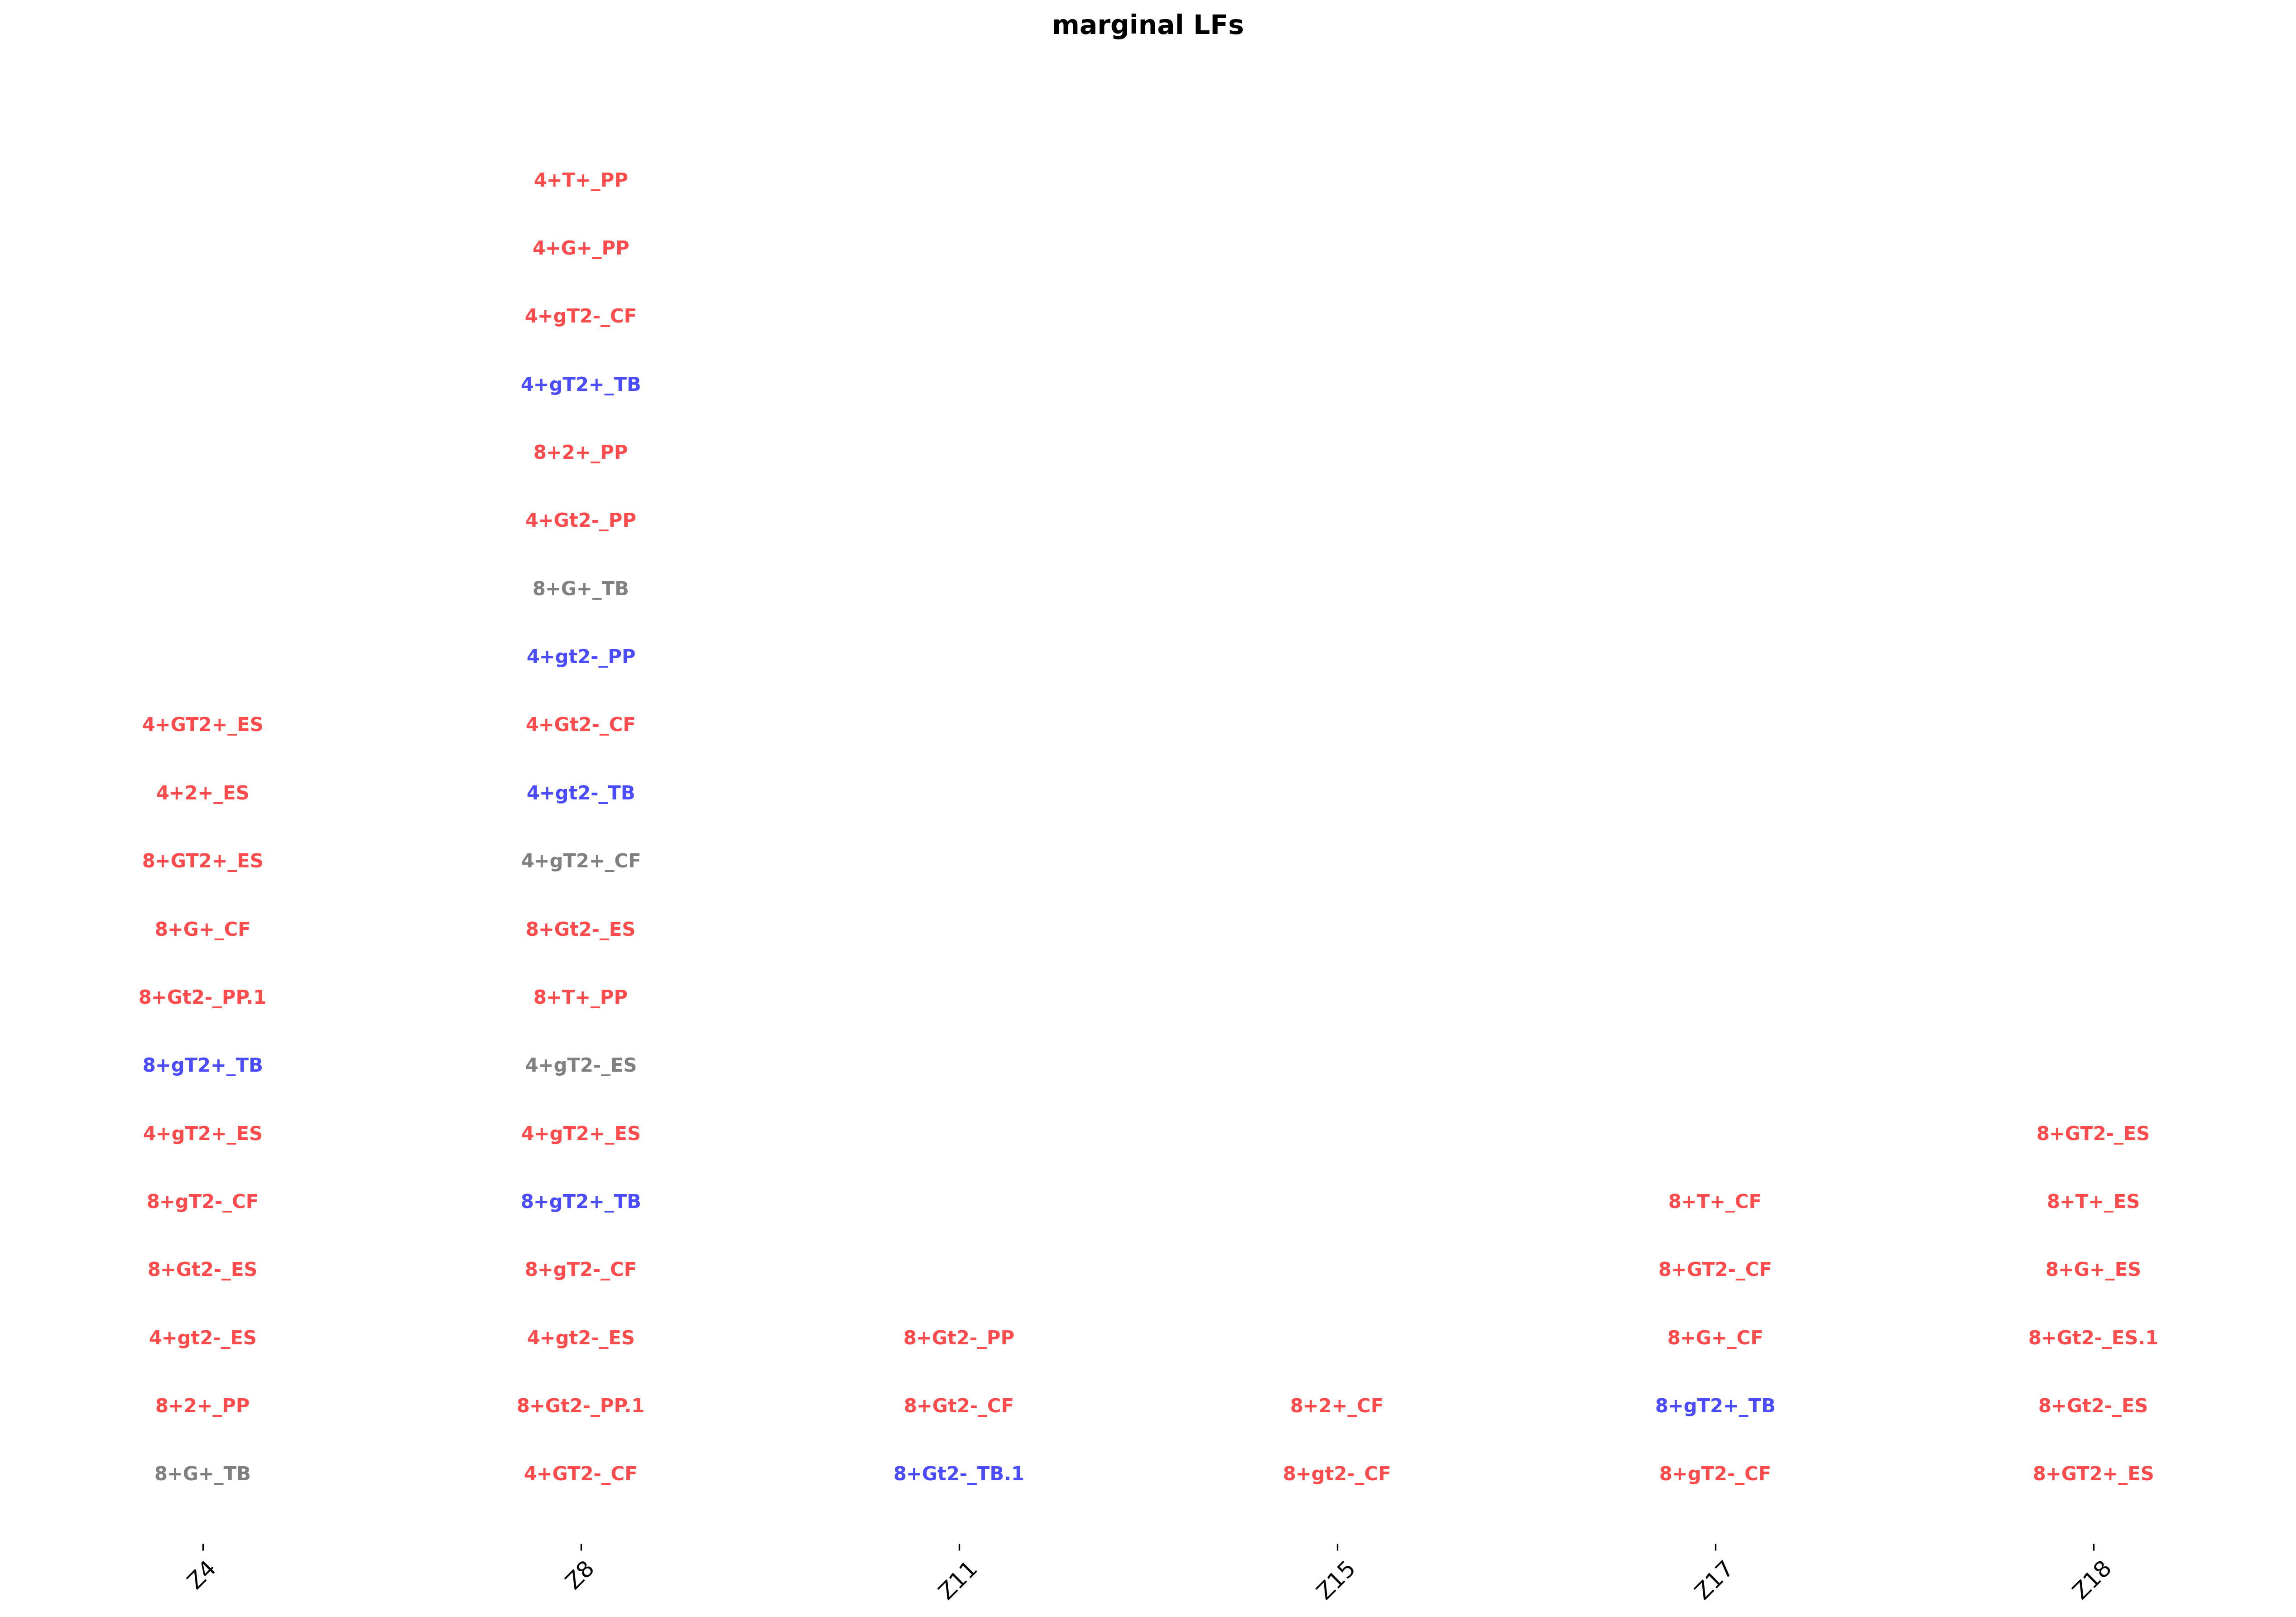

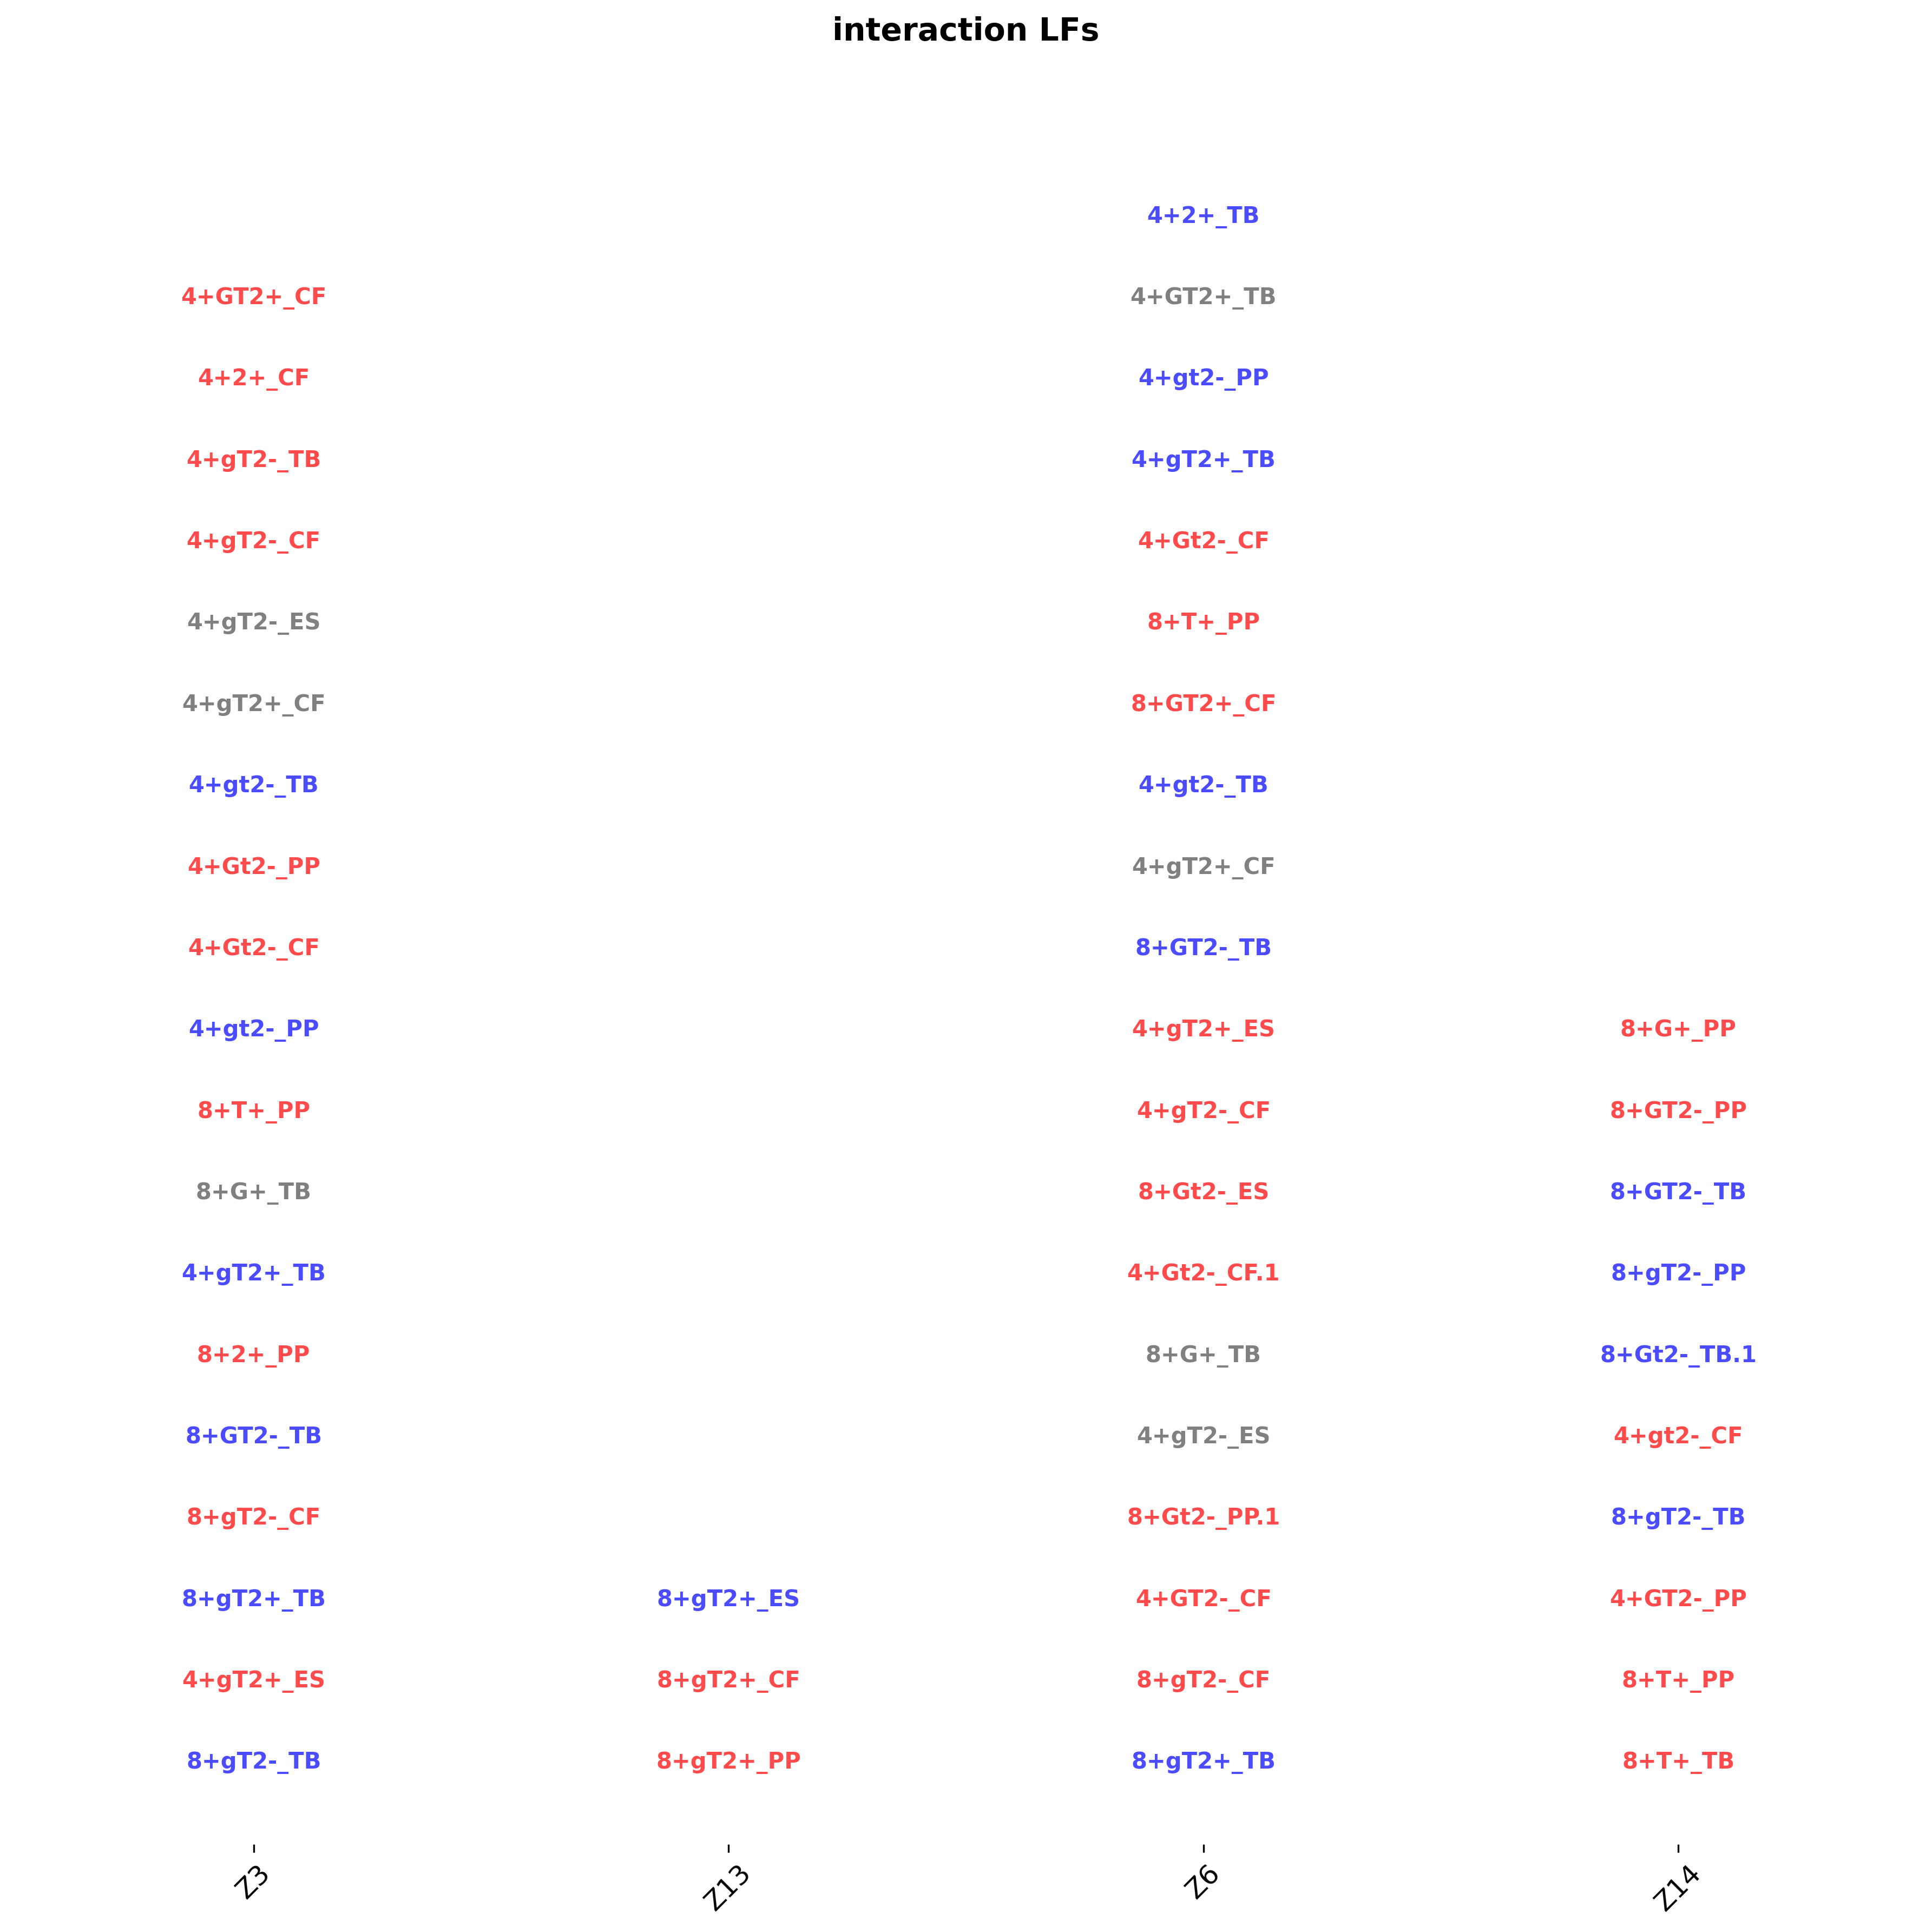

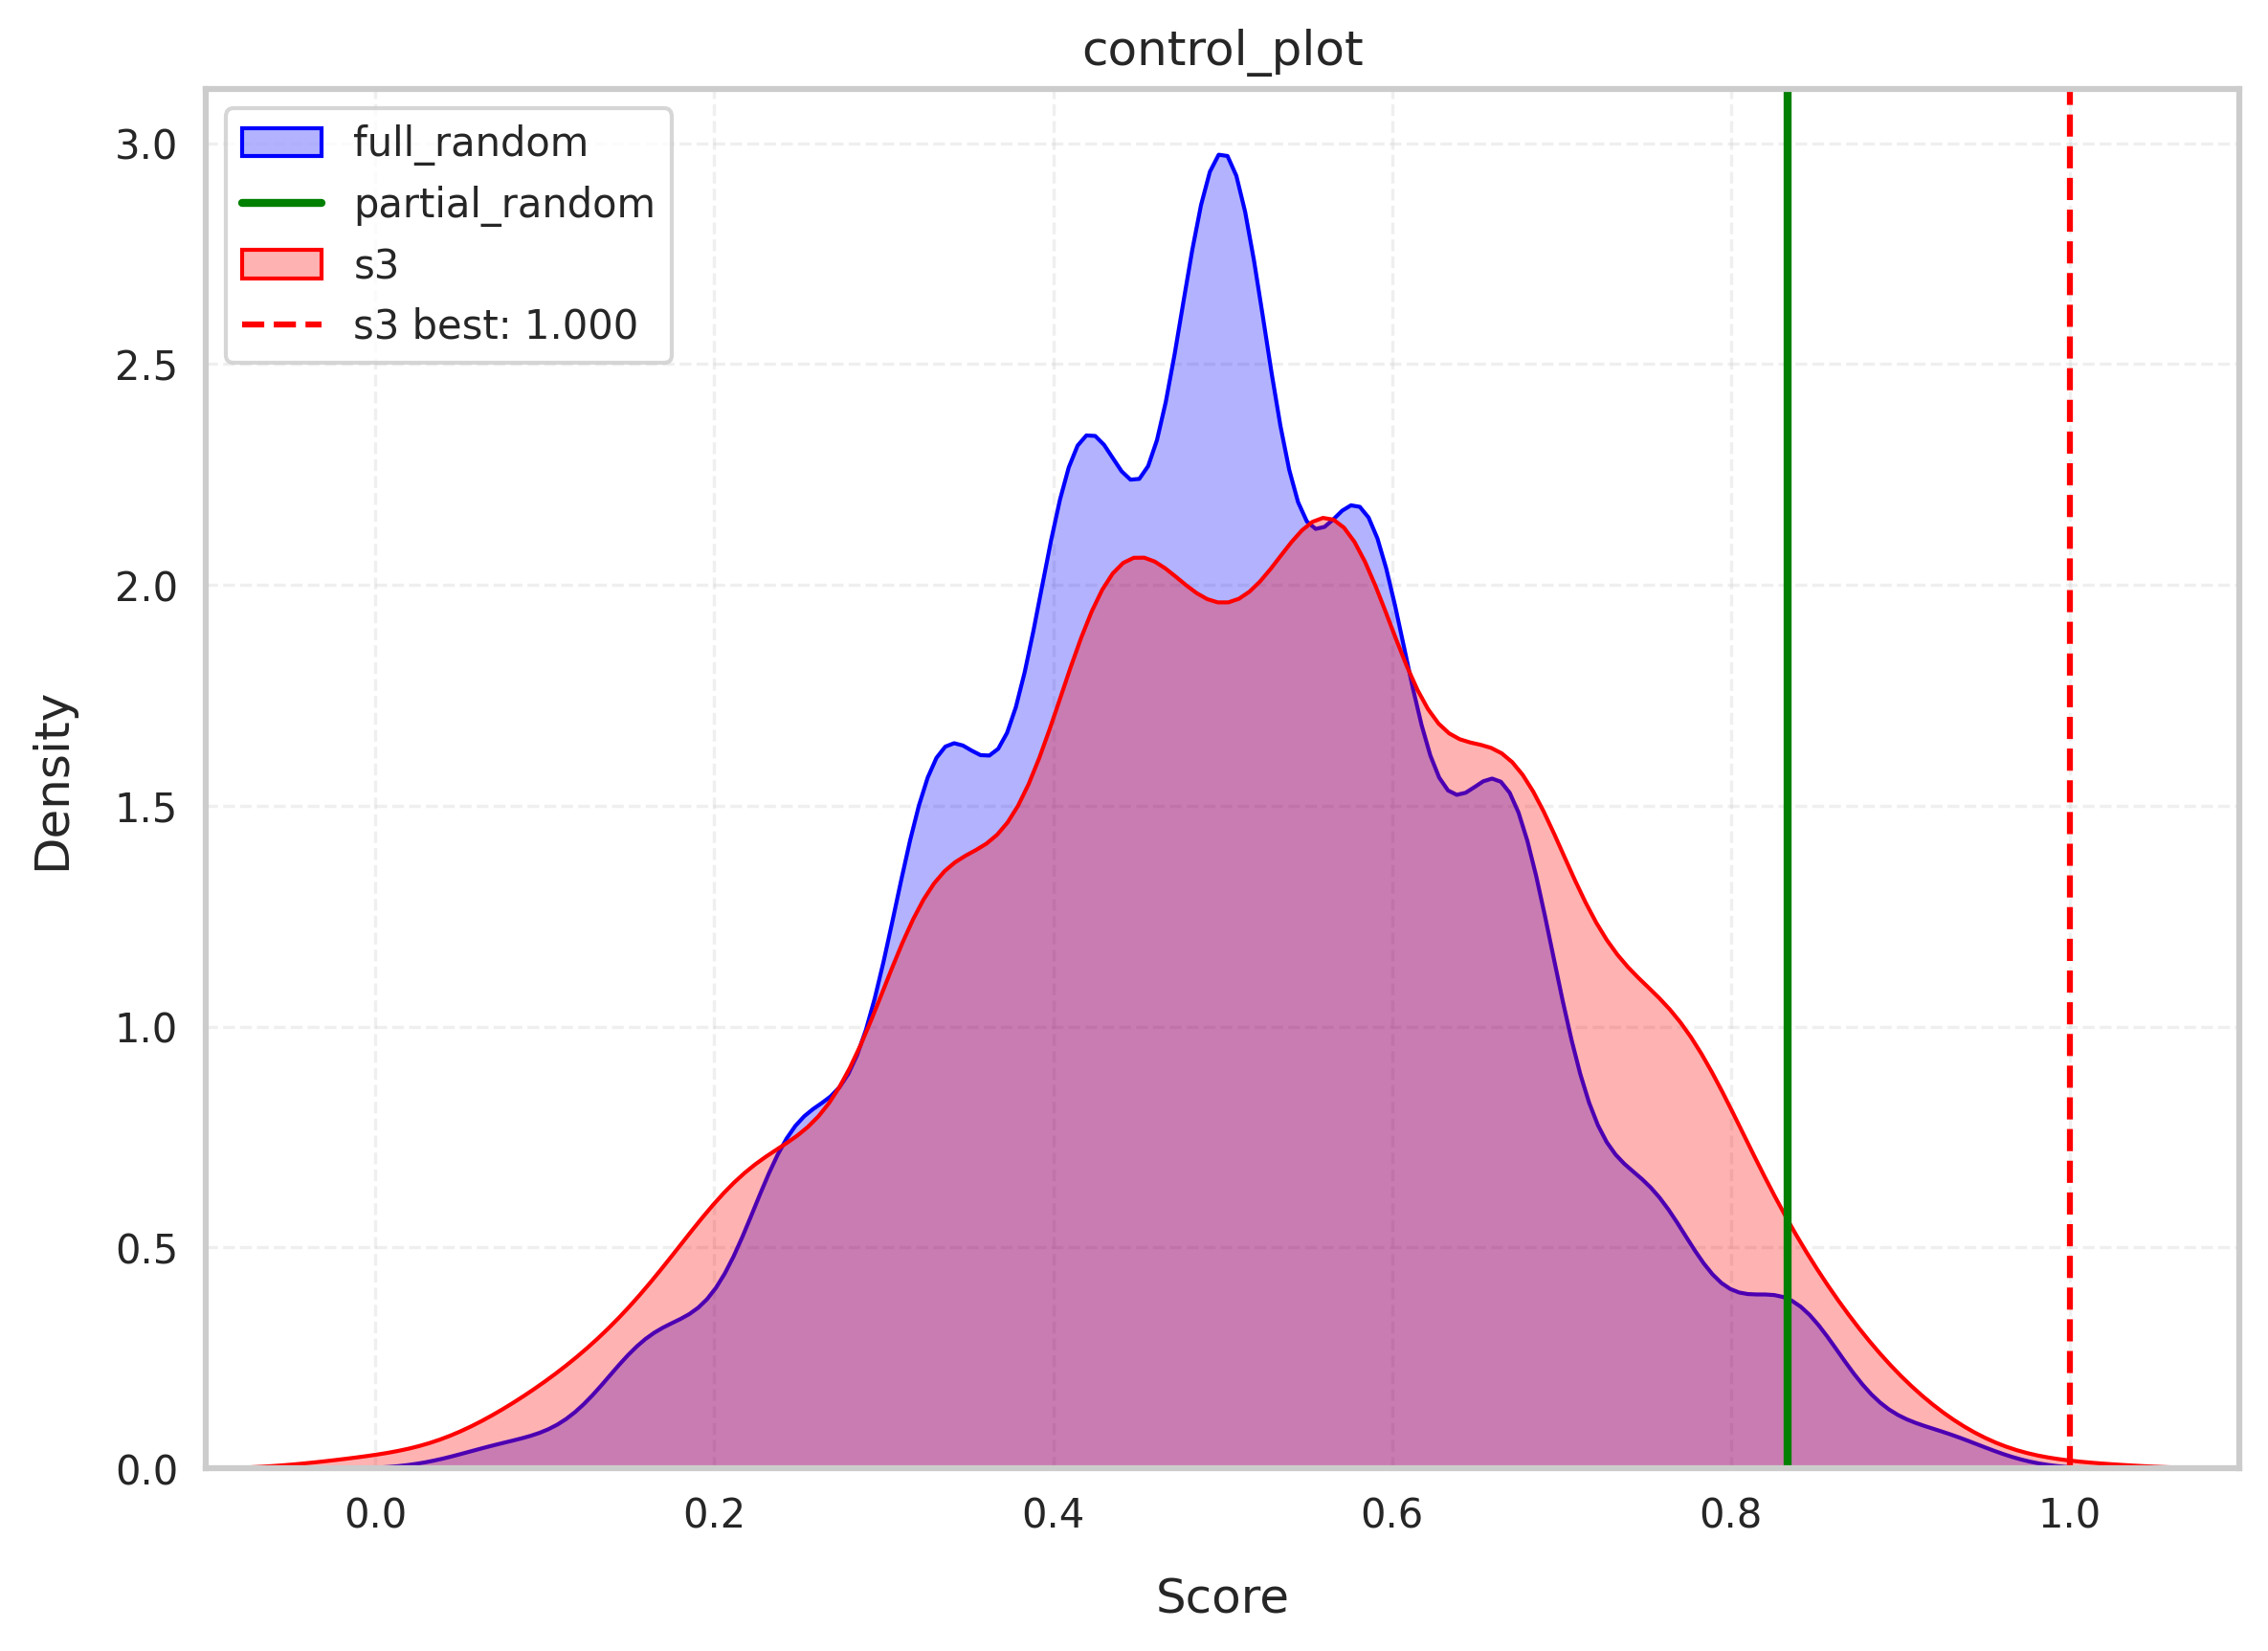

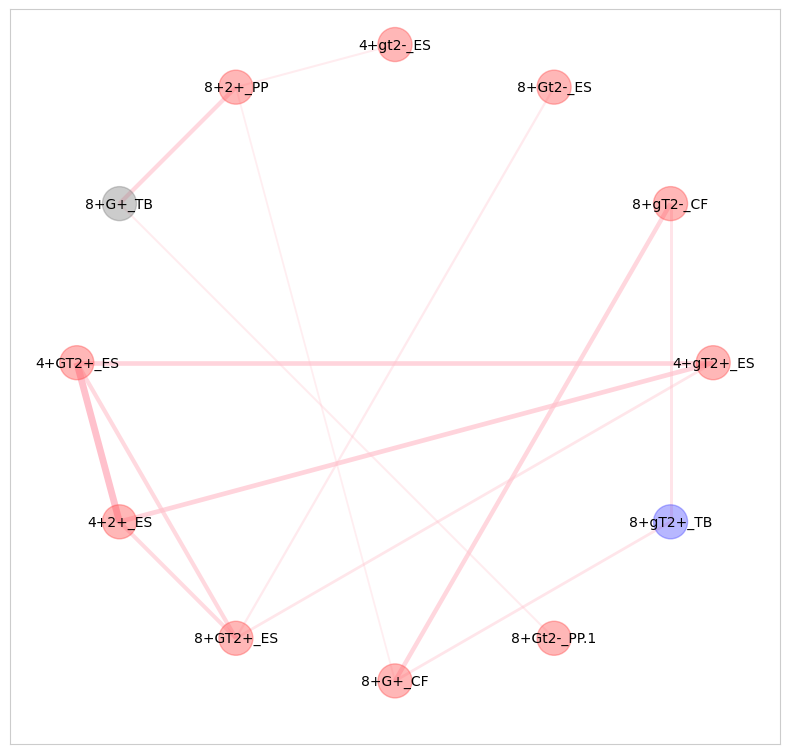

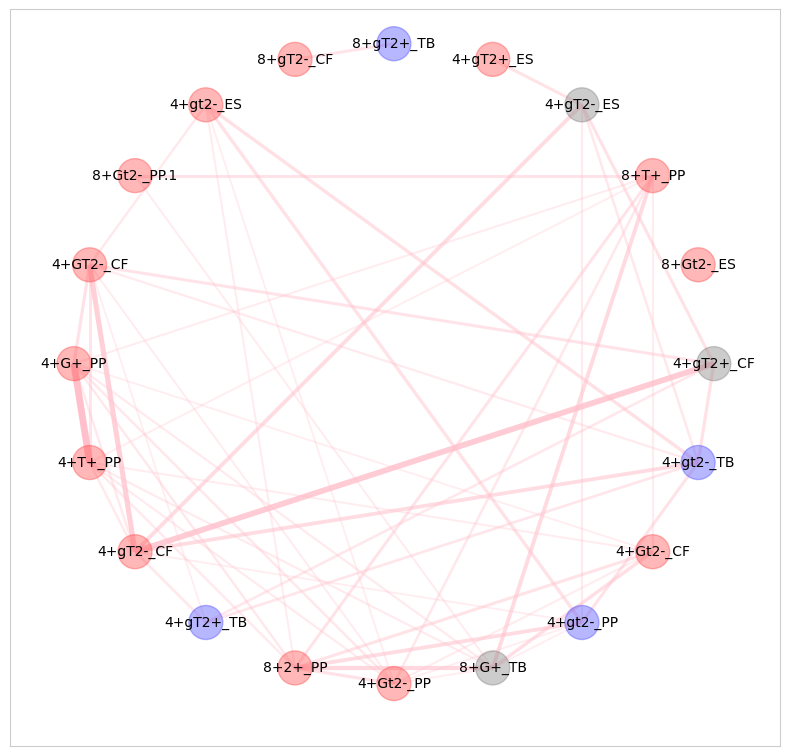

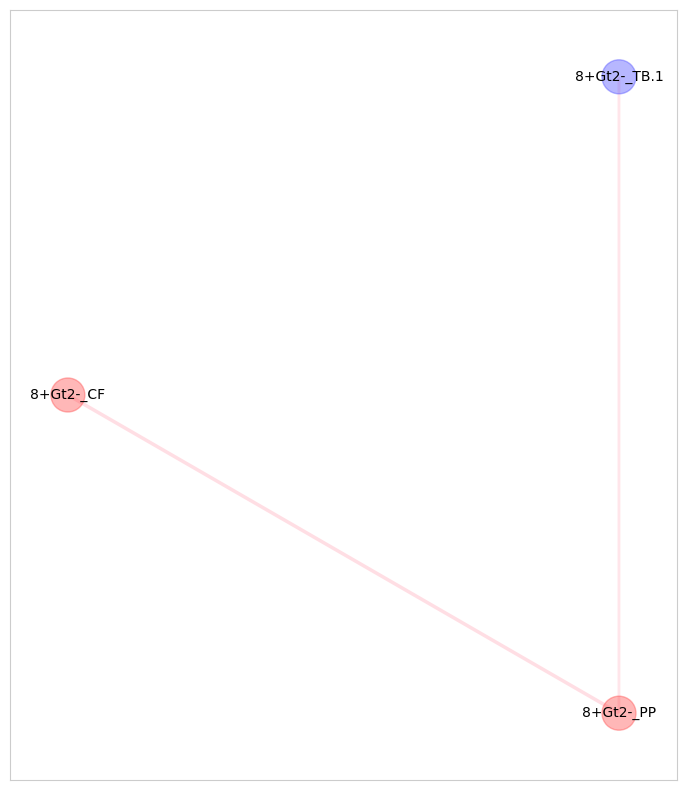

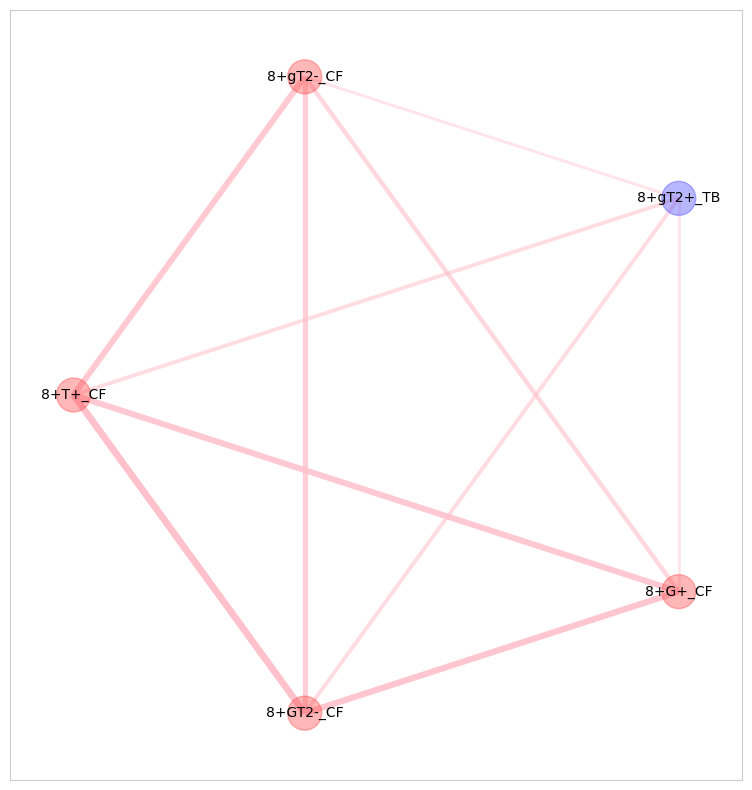

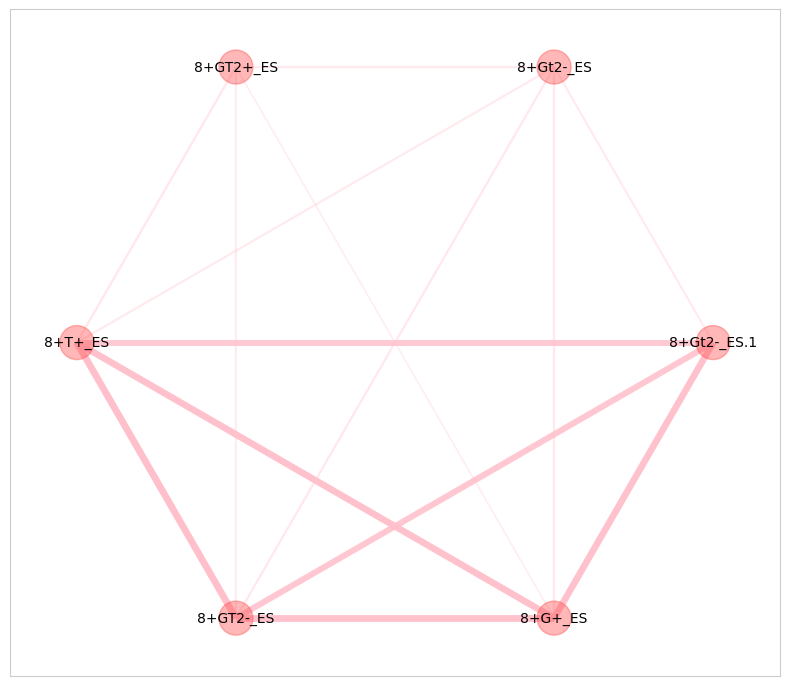

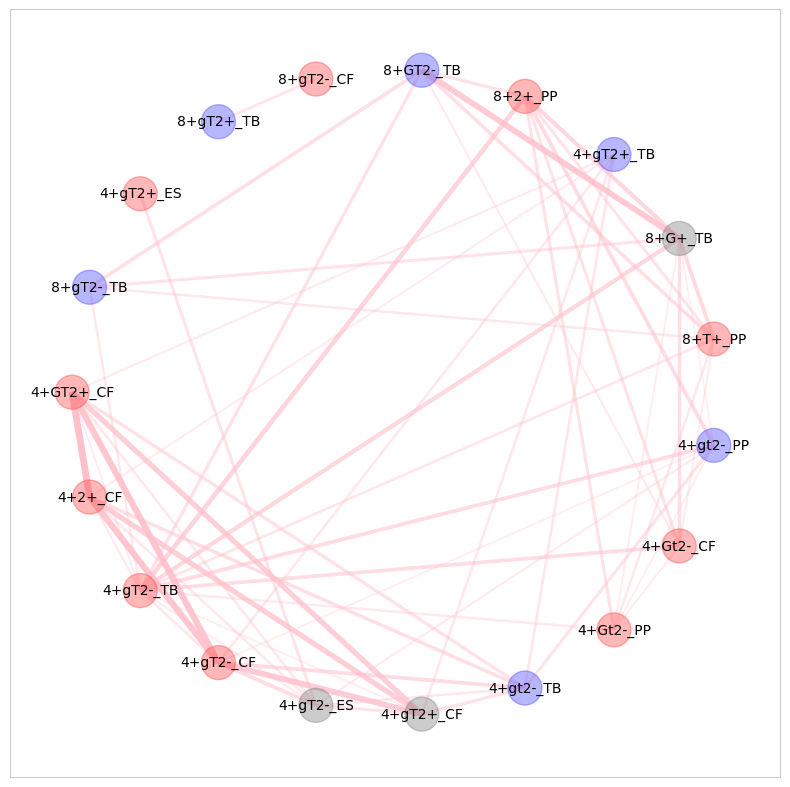

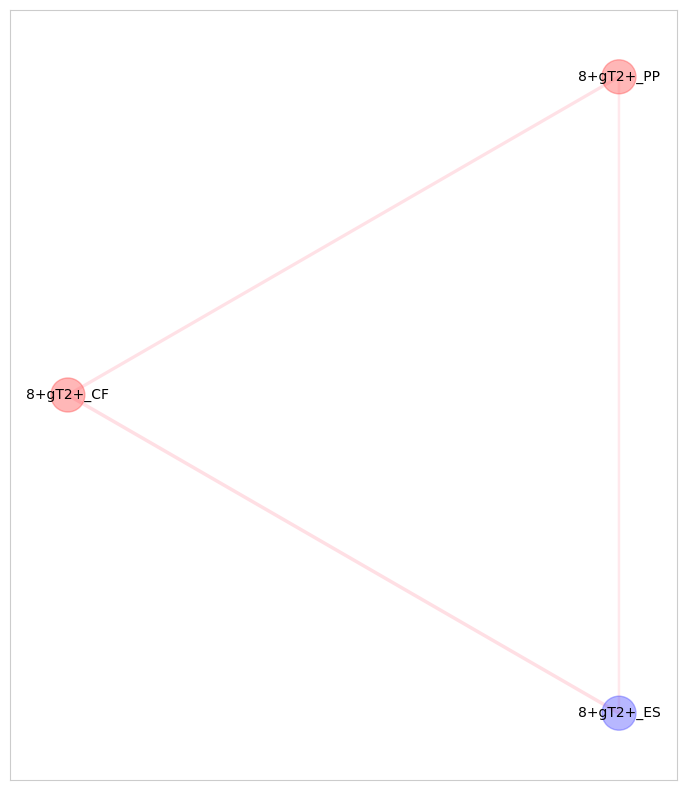

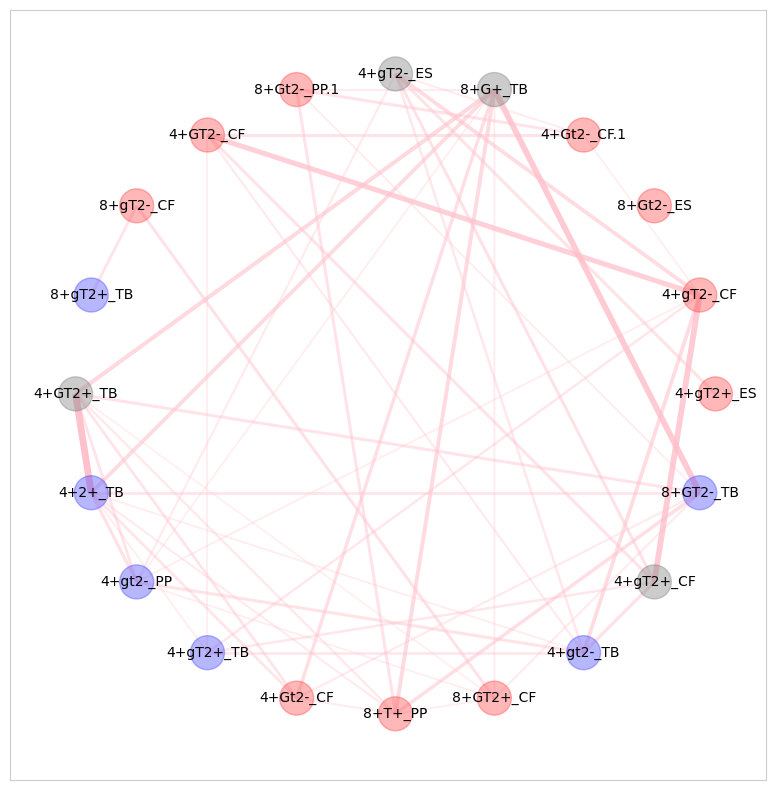

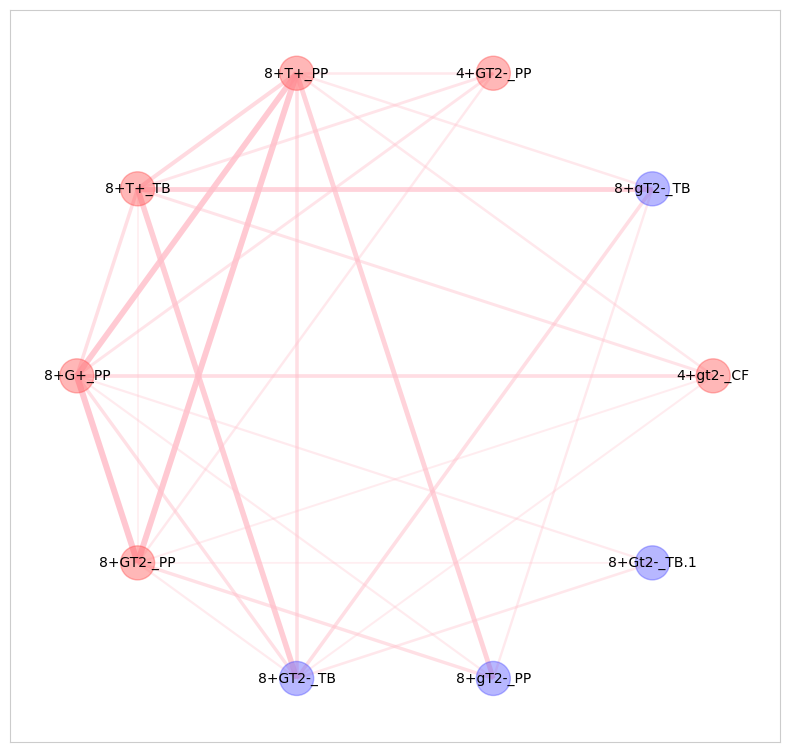

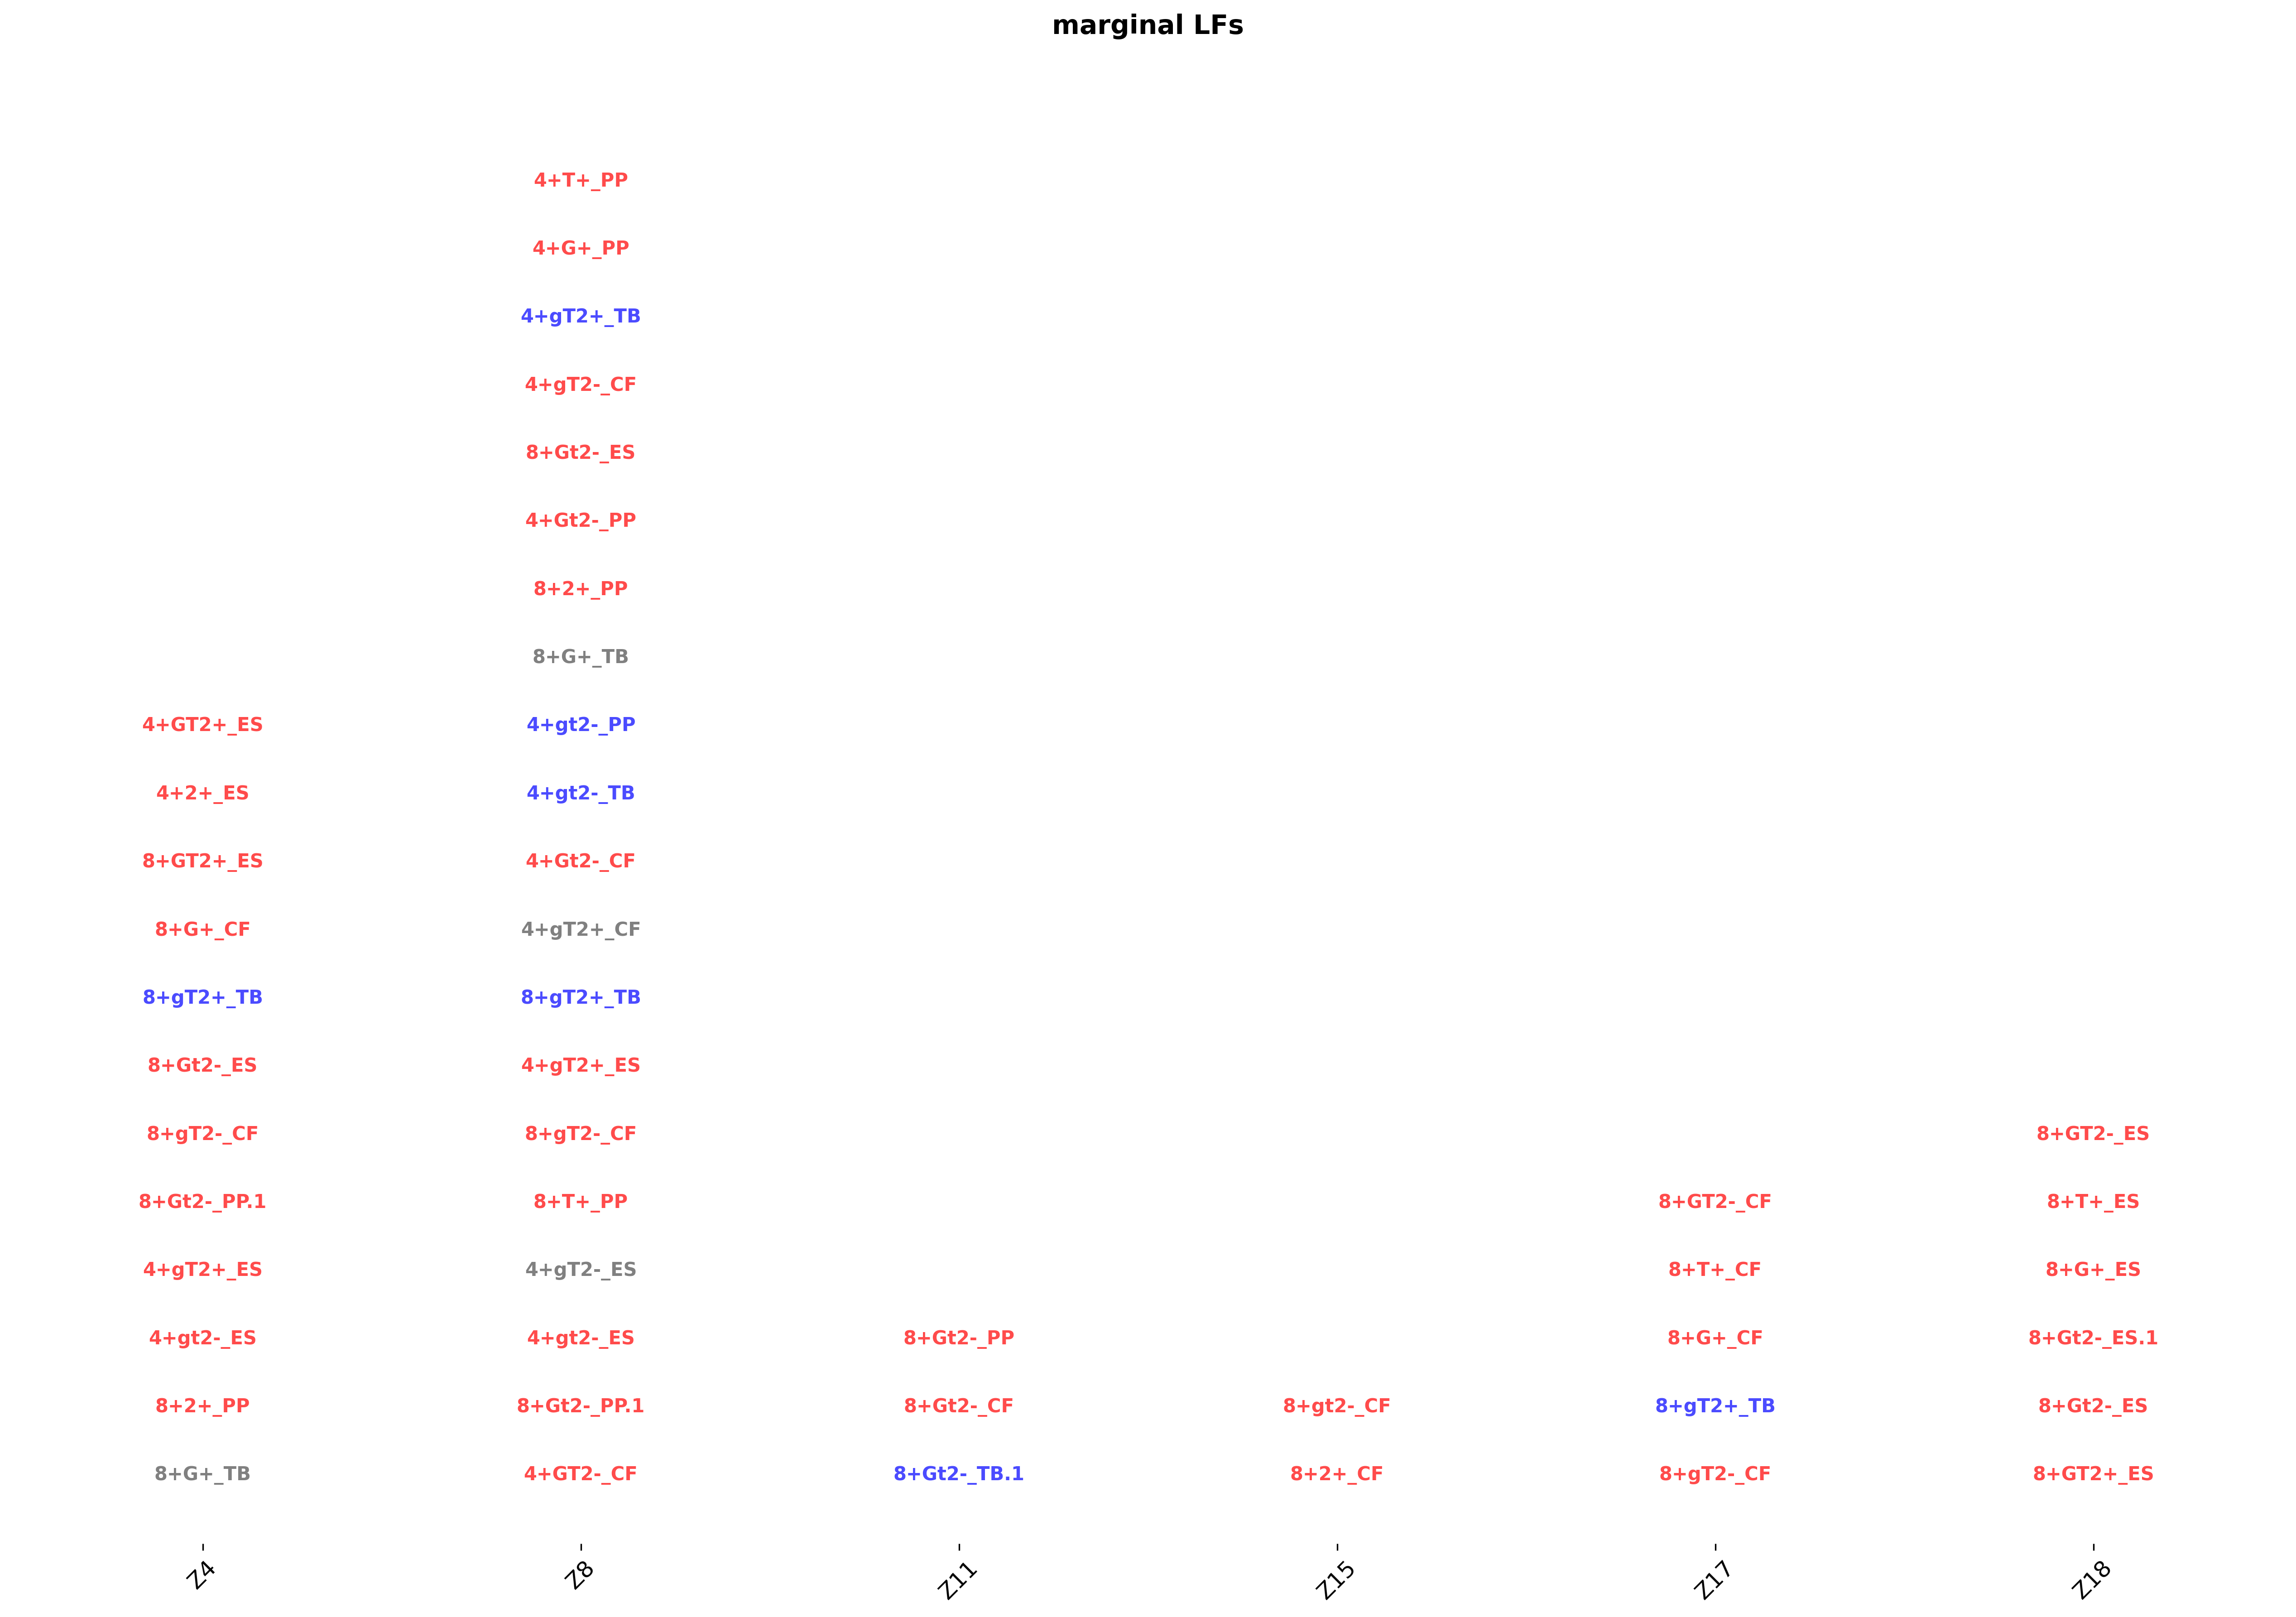

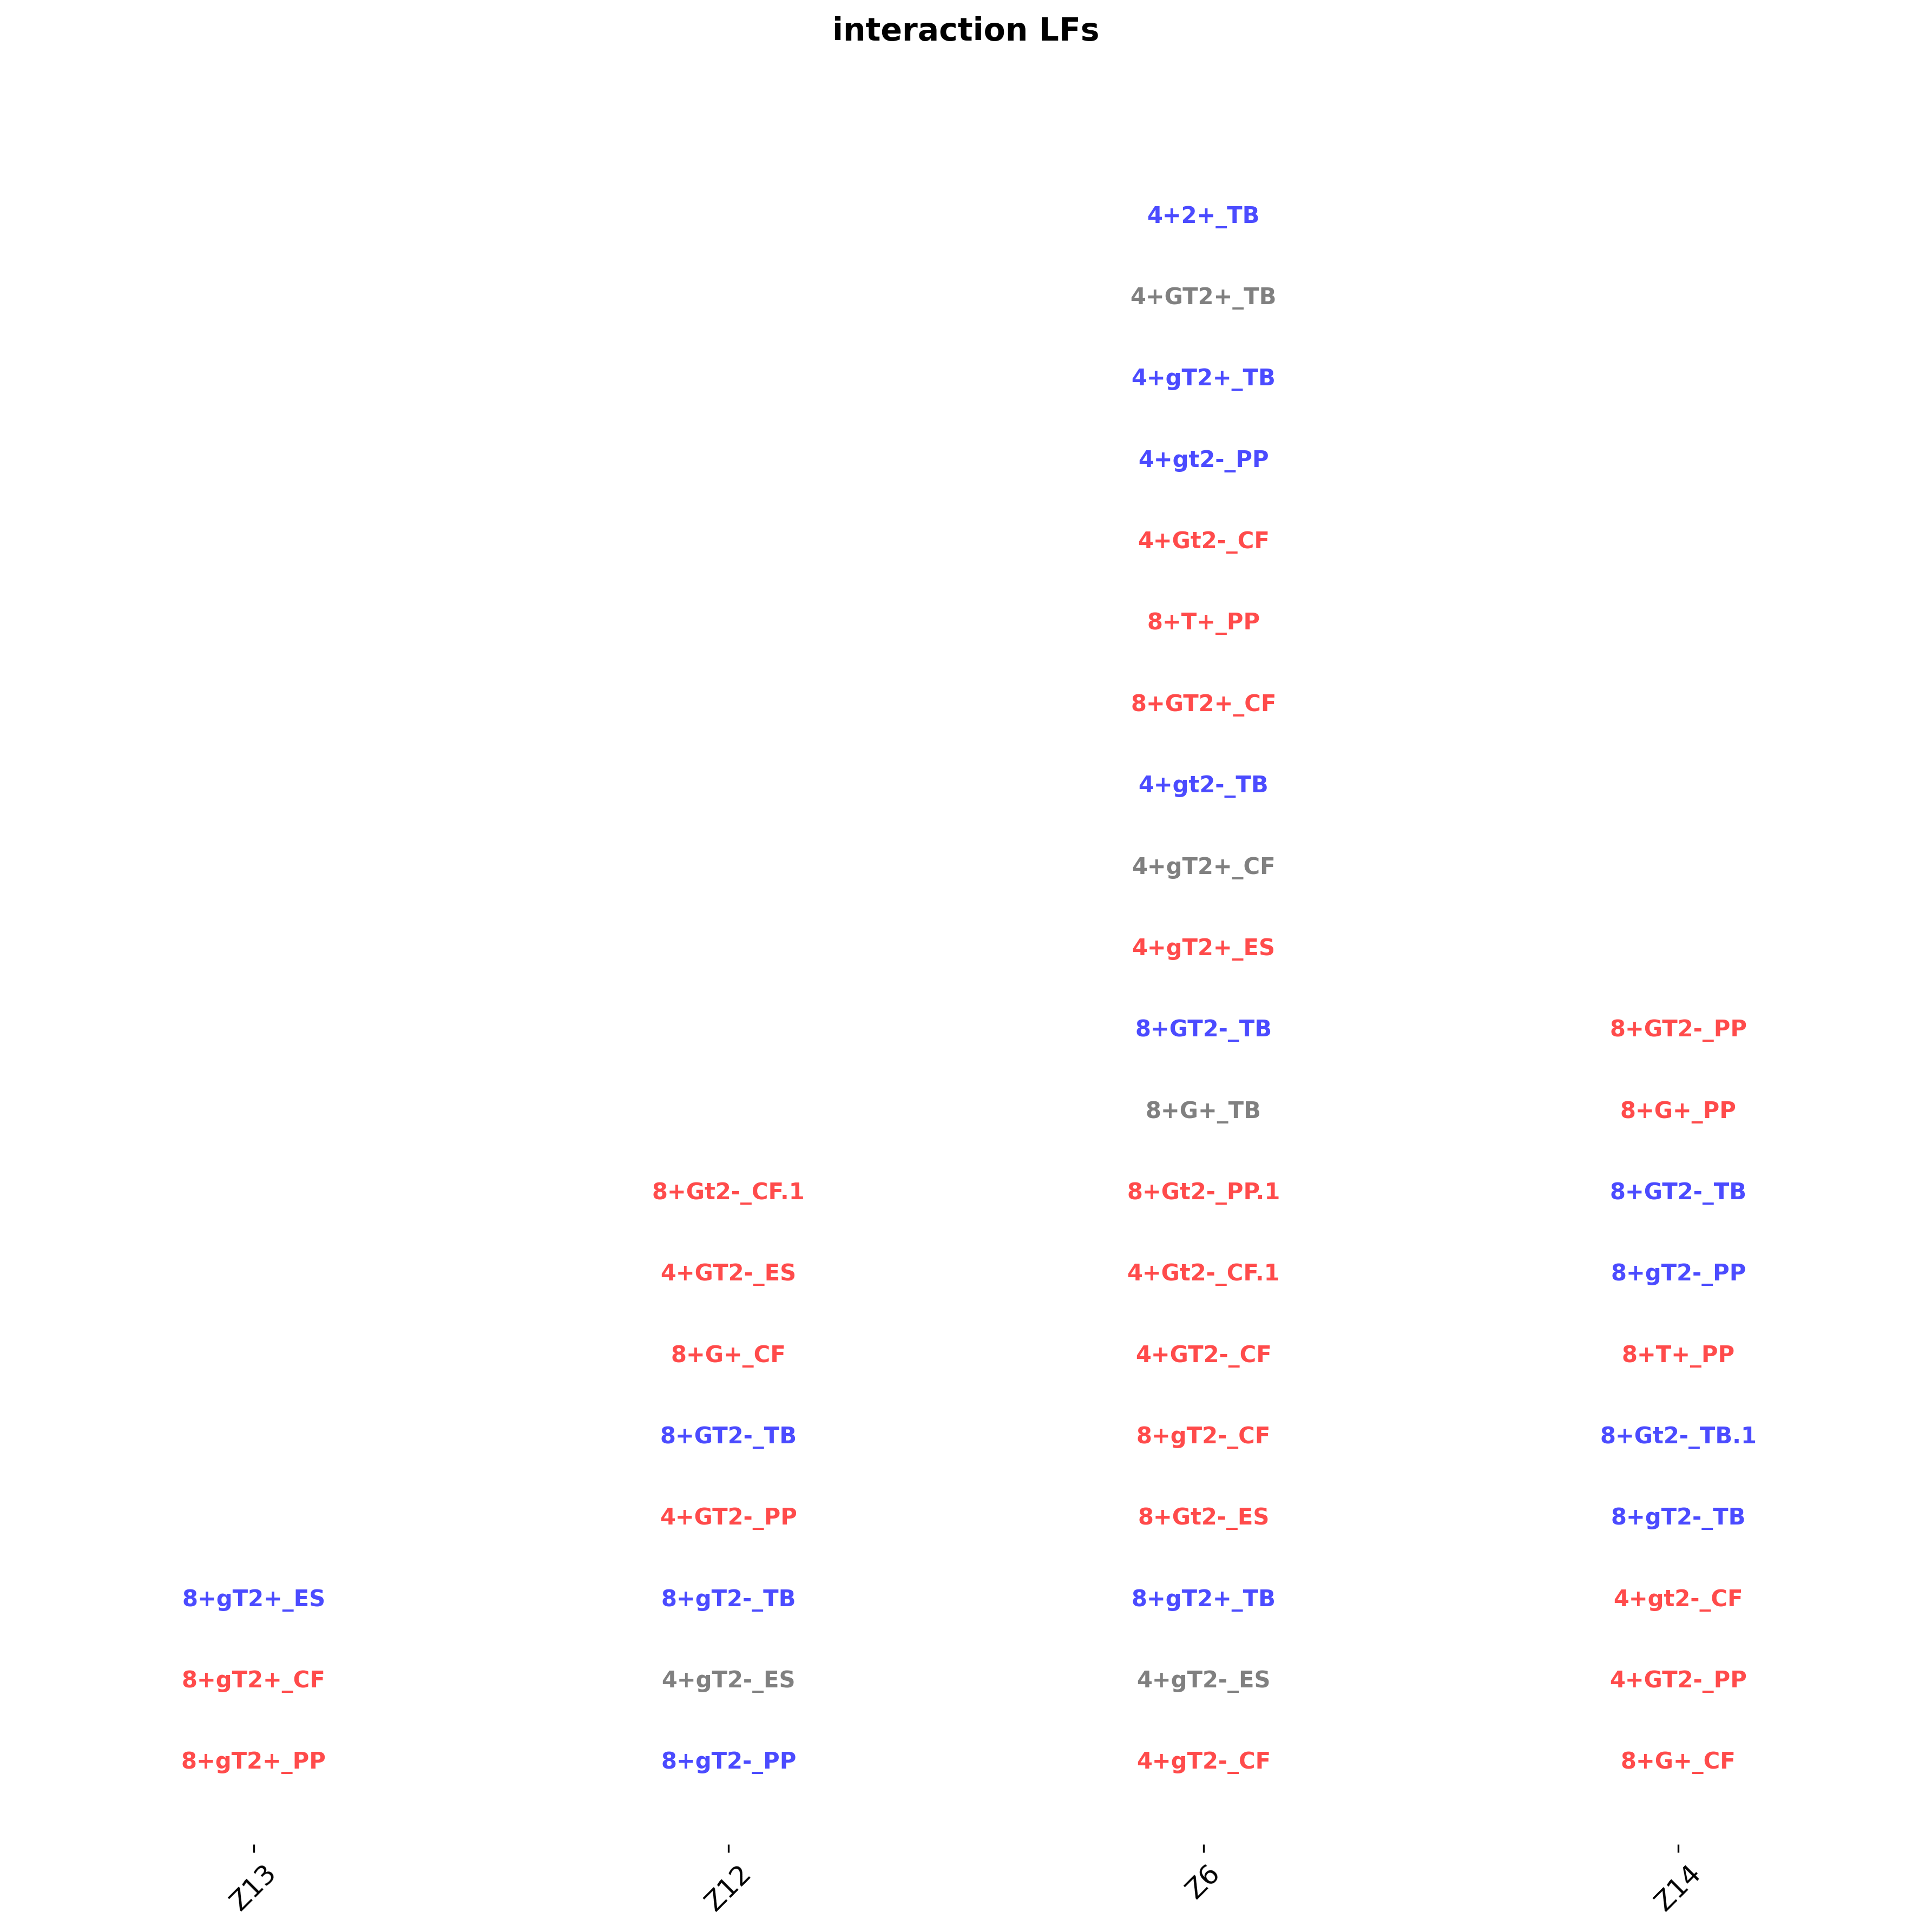

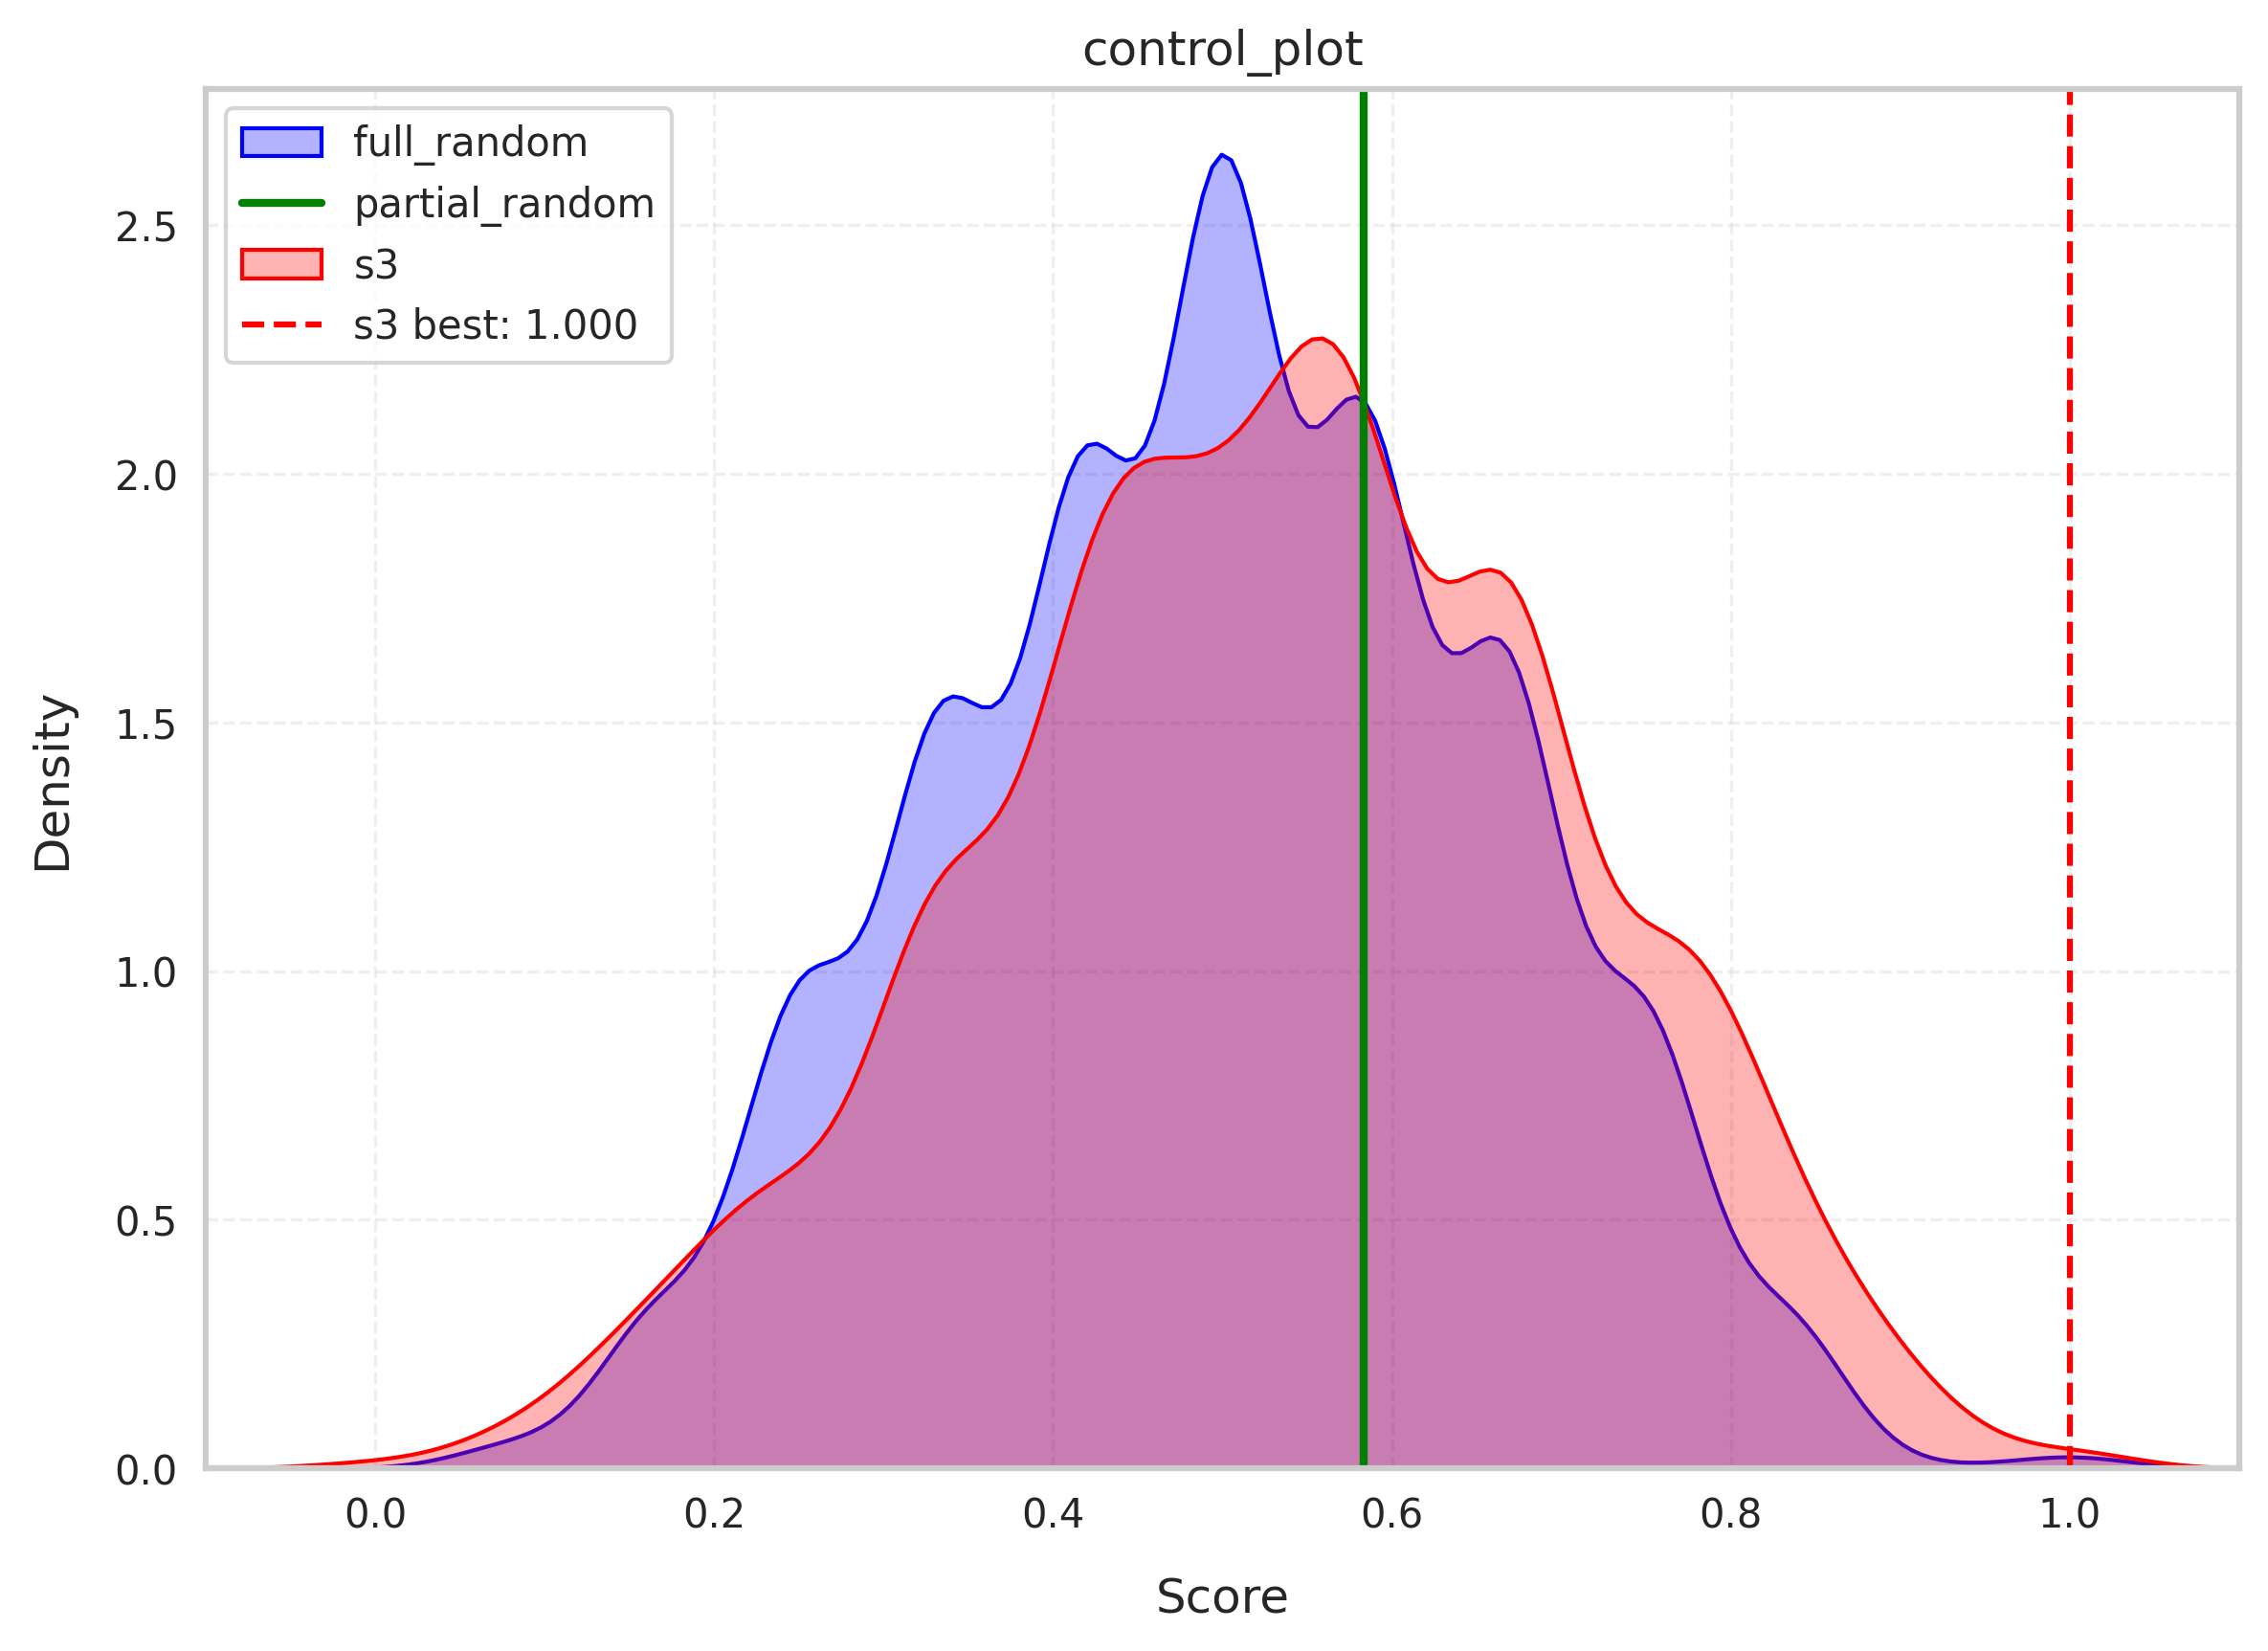

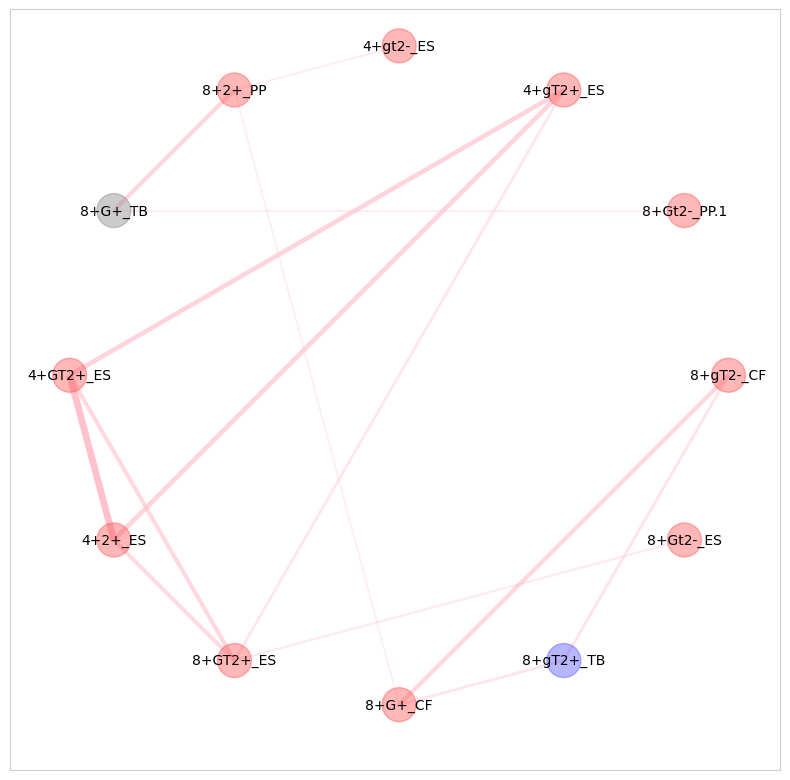

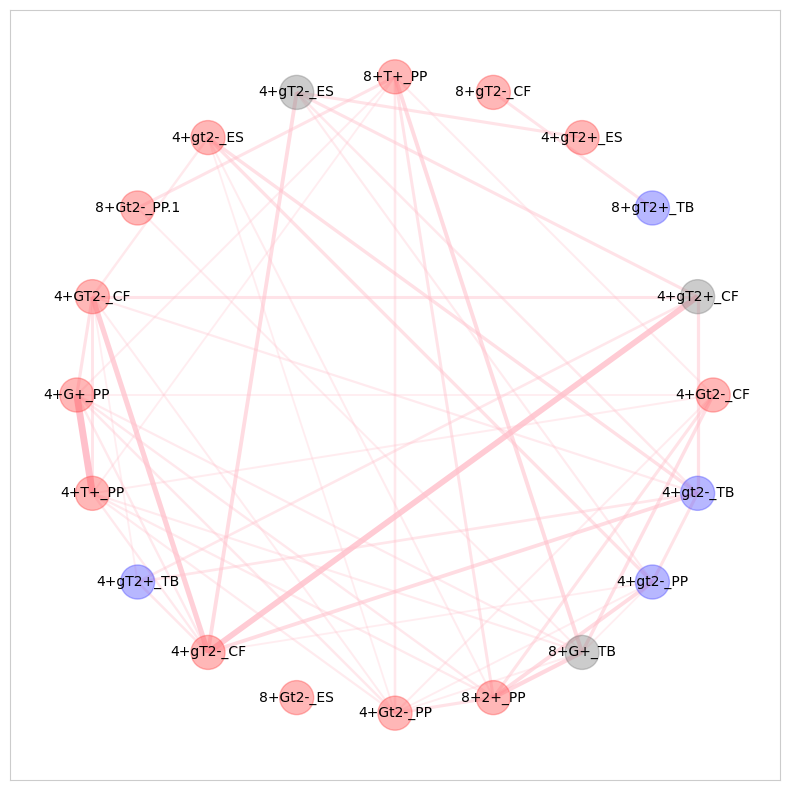

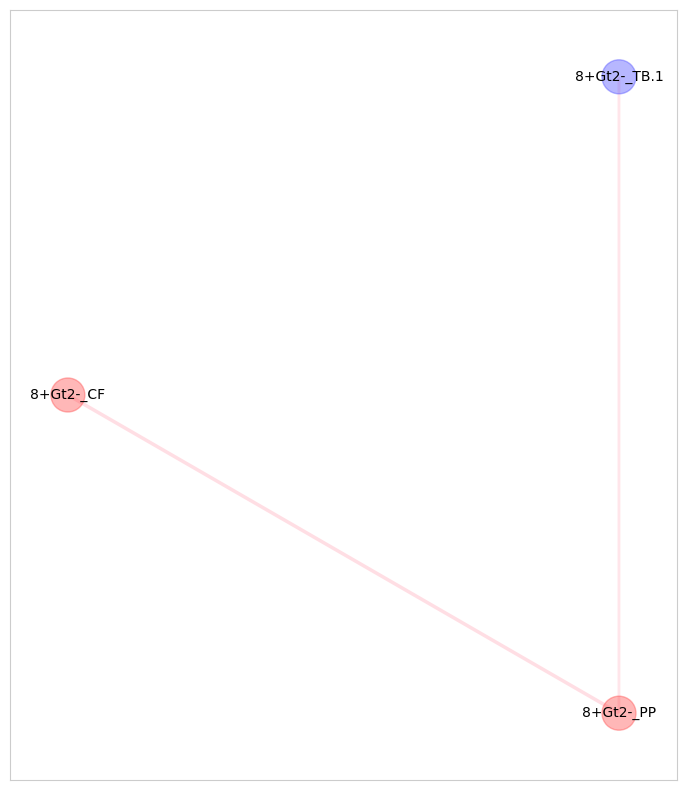

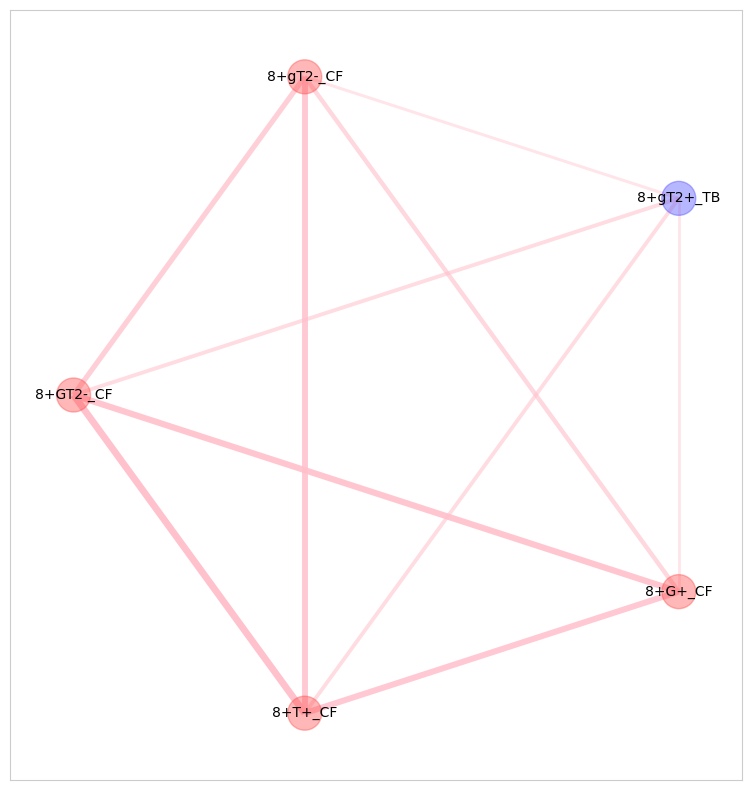

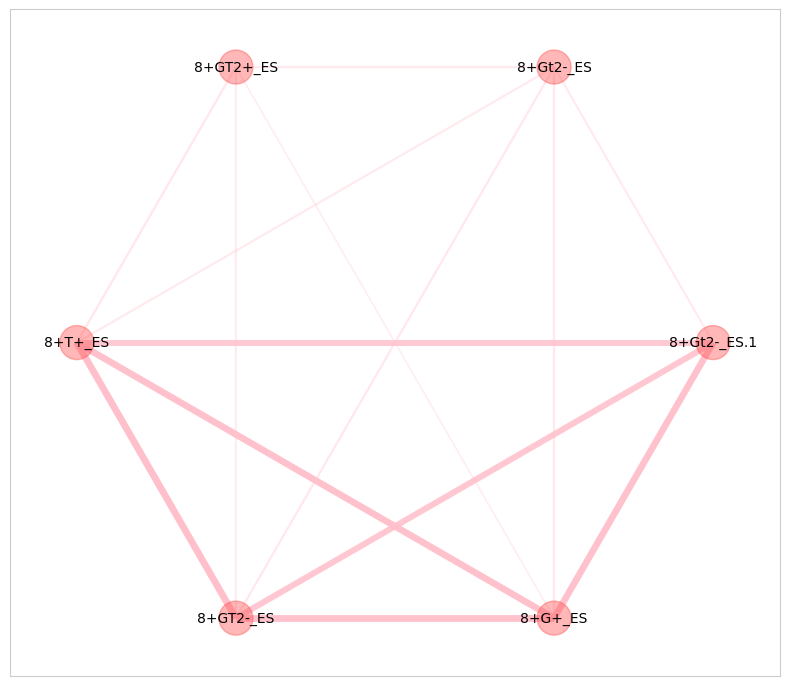

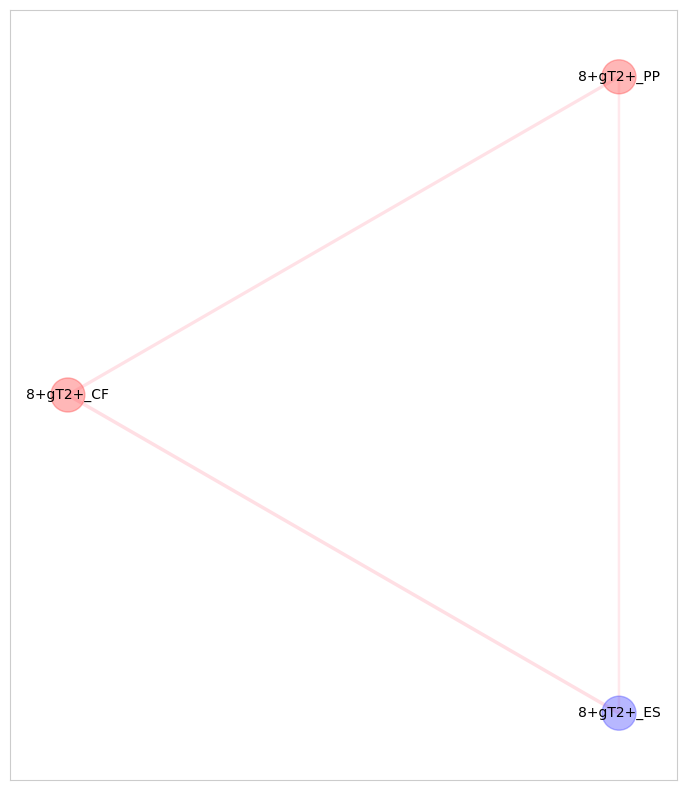

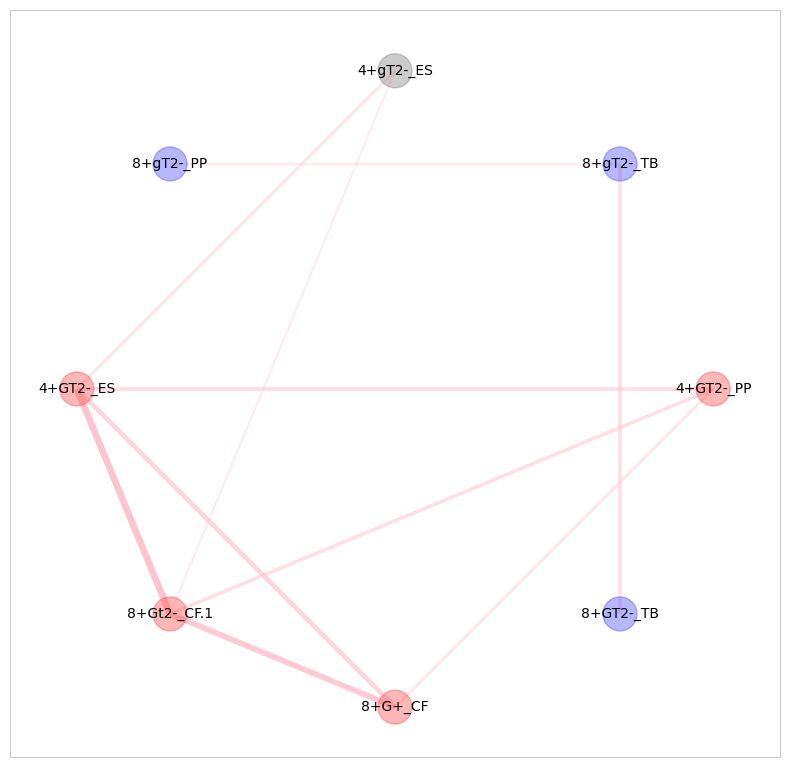

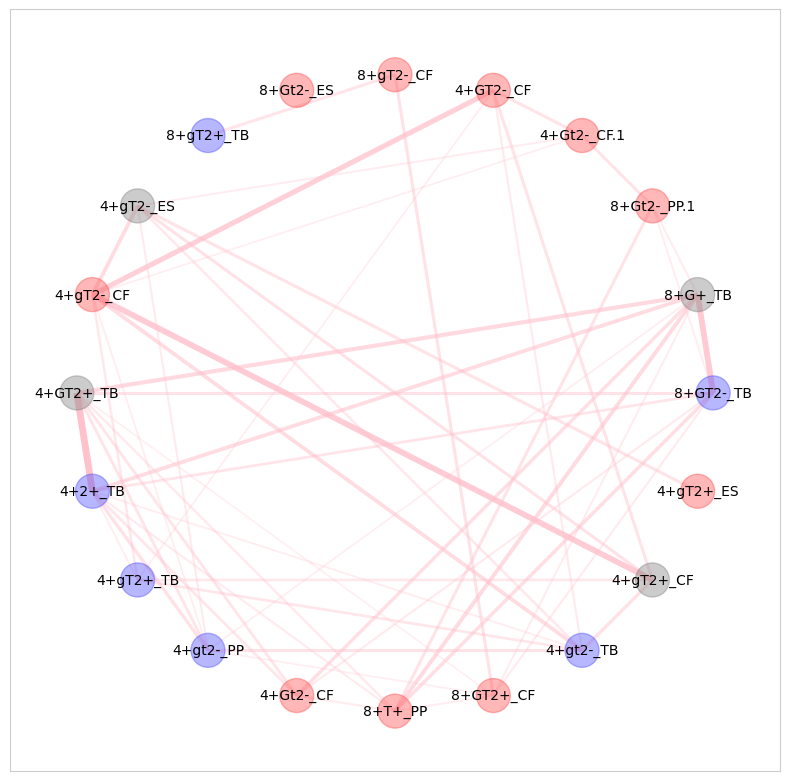

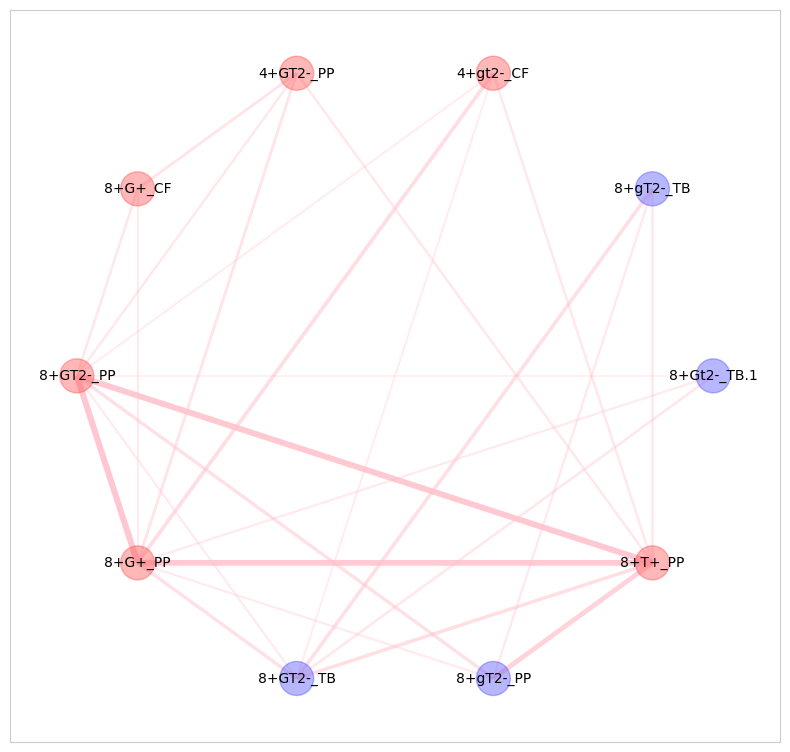

In [7]:
%%time
slider.run_pipeline(verbose=True, n_workers=1)